In [98]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import MySQLdb
import datetime
from sklearn.metrics import auc, mean_squared_error

In [99]:
import codecs
import lxml
from lxml import etree
import os
from mmap import mmap
import re
from os import listdir
from os.path import isfile, join
import MySQLdb
from datetime import datetime

In [123]:
import matplotlib as mpl
import datetime

In [145]:
whole_res = pd.read_excel('../data/whole_results_126.199867876.xls')

In [ ]:
whole_res

In [ ]:
whole_res

In [146]:
data = whole_res.groupby(['FlightID', "Code", "fltNrDptDt", "flightNrSf"], as_index = False)['actual', 'predictions'].sum()
data.rename(columns={'flightNrSf':'FltNr', 'fltNrDptDt':'Date'}, inplace = True)
data.sort_values(['FltNr', 'Date'], inplace = True)
data = data.groupby(['FltNr', 'Date'], as_index = False)['actual', 'predictions'].sum()
data

,FltNr,Date,actual,predictions
0,0,2017-01-31,4,5
1,0,2017-02-01,216,228
2,0,2017-02-02,252,220
3,0,2017-02-03,270,235
4,0,2017-02-04,195,218
5,0,2017-02-05,206,201
6,0,2017-02-06,226,204
7,0,2017-02-07,225,211
8,0,2017-02-08,276,219
9,0,2017-02-09,259,214


## Графики

In [147]:
data.Date = pd.DatetimeIndex(data.Date)

{0: '10J', 1: '50M', 2: '9J', 3: '49J', 4: '337J', 5: '337ZH', 6: '138J', 7: '137YQ', 8: '102J', 9: '101J', 10: '88J', 11: '87J'}

In [148]:
len(data[data.FltNr == 0]), len(data[data.FltNr == 1]), len(data[data.FltNr == 2]), len(data[data.FltNr == 3]), len(data[data.FltNr == 4]), len(data[data.FltNr == 5]), len(data[data.FltNr == 6]), len(data[data.FltNr == 7]), len(data[data.FltNr == 8]), len(data[data.FltNr == 9]), len(data[data.FltNr == 10]), len(data[data.FltNr == 11])

(60, 57, 60, 60, 30, 29, 0, 0, 0, 0, 0, 0)

**9J, 10J**

In [149]:
def countPercentError(fn):
    return str(1 - np.mean(np.abs(data[data.FltNr == fn].actual - data[data.FltNr == fn].predictions) / data[data.FltNr == fn].predictions)) + '%'

0.820659523328885%


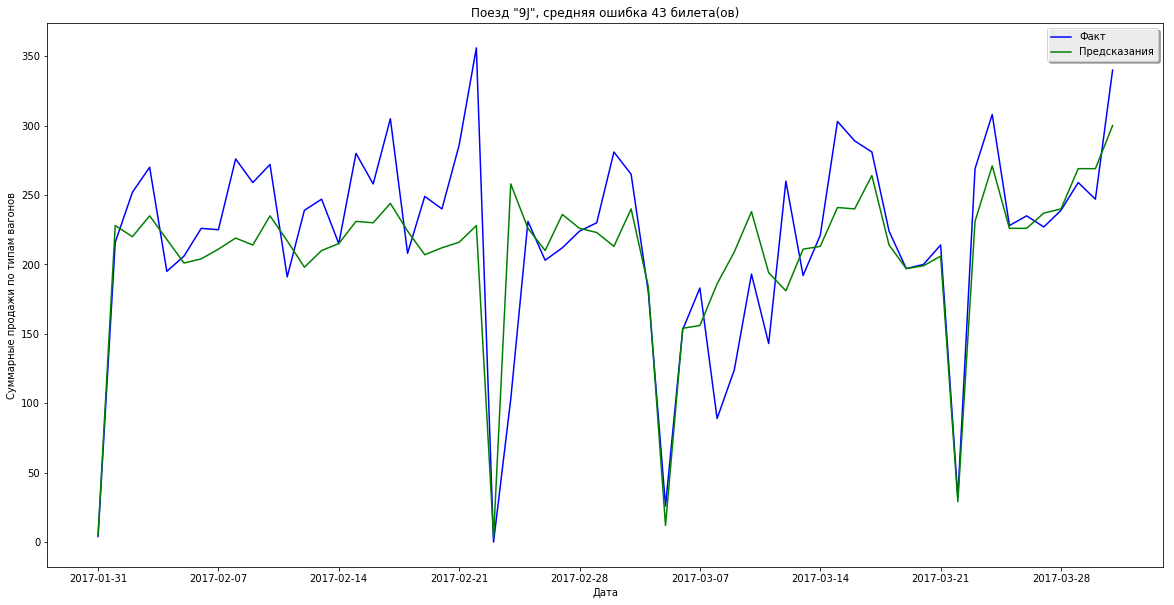

In [150]:
plt.figure(figsize=(20, 10))
fn = 0
print(countPercentError(fn))
mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "9J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

0.7783775204420186%


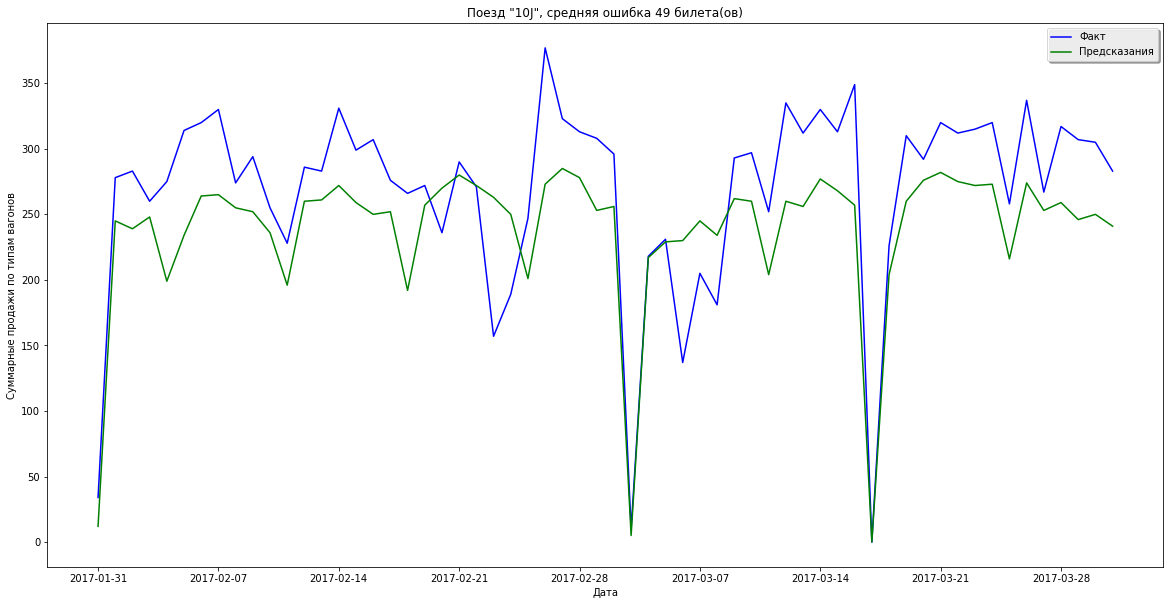

In [151]:
plt.figure(figsize=(20, 10))
fn = 2
print(countPercentError(fn))
mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "10J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**49J, 50M**

0.7565673936062172%


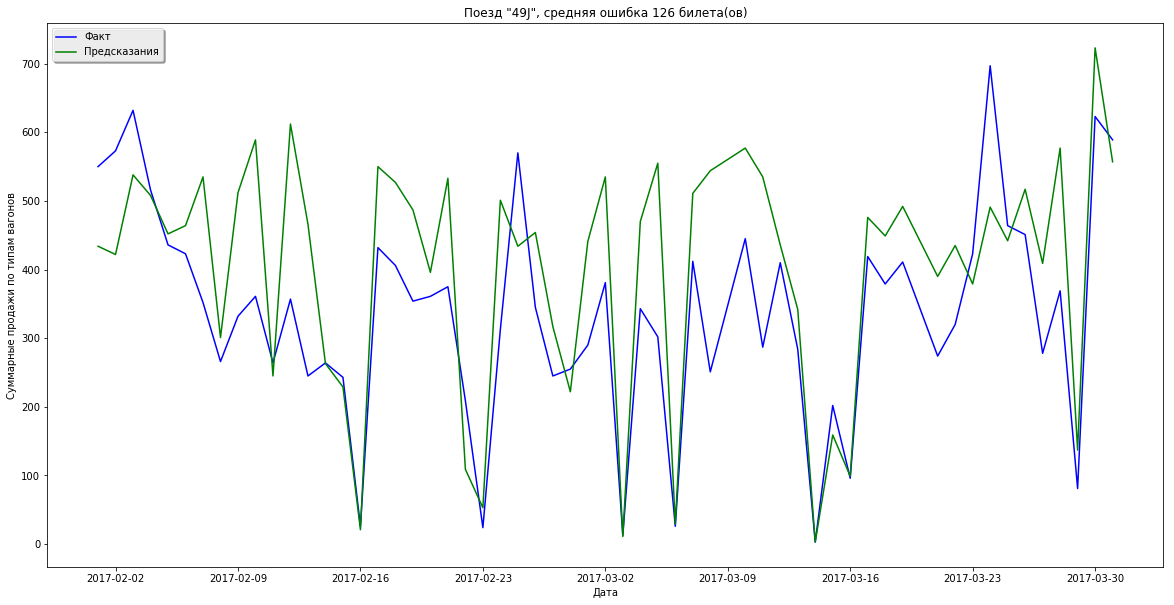

In [152]:
plt.figure(figsize=(20, 10))
fn = 1

print(countPercentError(fn))
mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "49J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

0.6988882001591553%


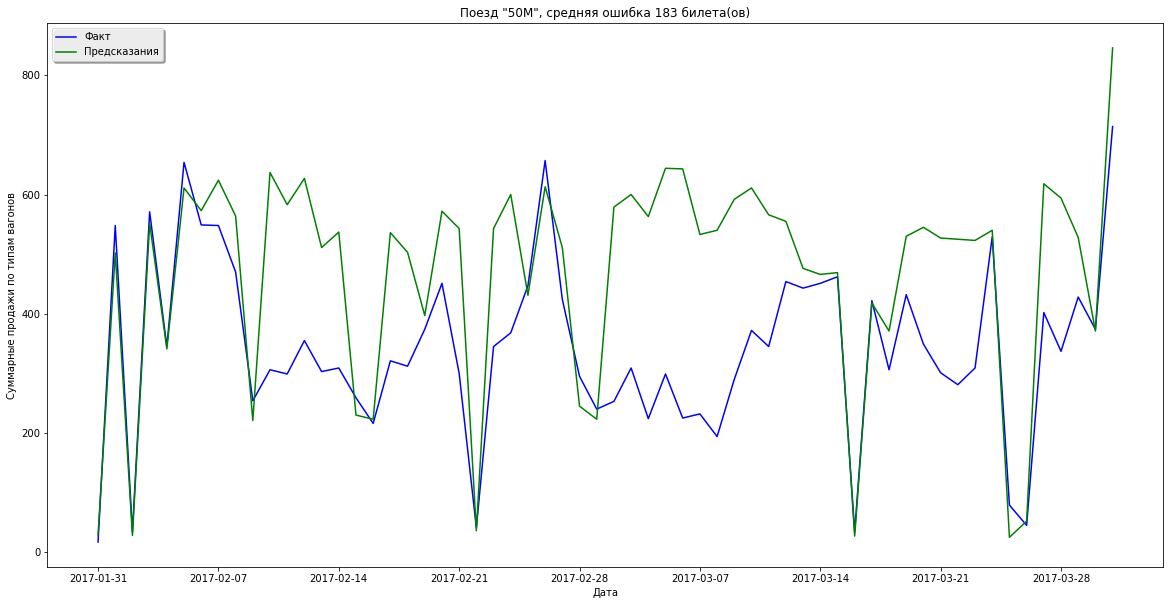

In [153]:
plt.figure(figsize=(20, 10))
fn = 3

print(countPercentError(fn))
mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
plt.title('Поезд "50M", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**138J, 137YQ**

In [154]:
plt.figure(figsize=(20, 10))
fn = 6

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "138J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
plt.figure(figsize=(20, 10))
fn = 7

x = np.arange(0, len(data[data.FltNr == fn]))
mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "137YQ", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**337J, 337ZH**

In [ ]:
plt.figure(figsize=(20, 10))
fn = 4

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "337J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
fn = 5

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "337ZH", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

** 102J, 101J**

In [ ]:
plt.figure(figsize=(20, 10))
fn = 8

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "102J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
fn = 9

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "101J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**87J, 88J**

In [ ]:
plt.figure(figsize=(20, 10))
fn = 10

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "88J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
fn = 11

mse = np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions))
print(countPercentError(fn))
plt.title('Поезд "87J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(data[data.FltNr == fn].Date, data[data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**Общие**

In [155]:
data_all = data.groupby(['Date'], as_index=False)['actual', 'predictions'].sum()
data_all

,Date,actual,predictions
0,2017-01-31,55,46
1,2017-02-01,2021,1778
2,2017-02-02,1434,1195
3,2017-02-03,1733,1573
4,2017-02-04,2132,2139
5,2017-02-05,1610,1498
6,2017-02-06,2063,2092
7,2017-02-07,1455,1635
8,2017-02-08,1998,2162
9,2017-02-09,1139,1199


In [156]:
np.mean(np.abs(data_all.actual - data_all.predictions) / data_all.predictions)

0.16004379939366906

334.274587727


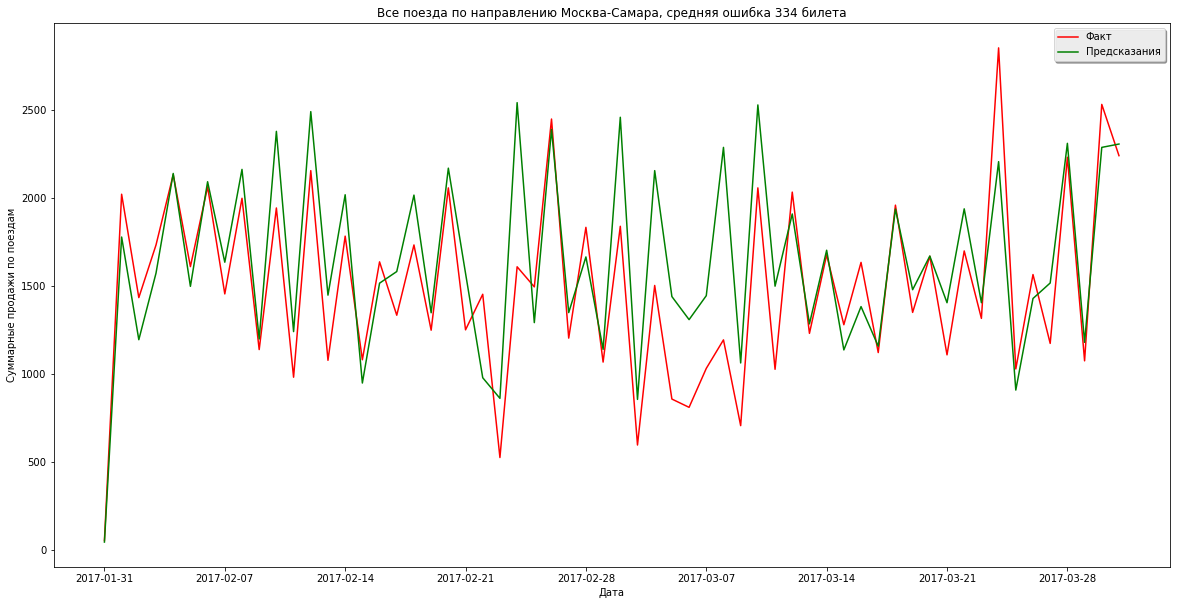

In [157]:
plt.figure(figsize=(20,10))
mse = np.sqrt(mean_squared_error(data_all.actual, data_all.predictions))
print(mse)
plt.title('Все поезда по направлению Москва-Самара, средняя ошибка ' + str(int(mse)) + ' билета')
plt.ylabel('Суммарные продажи по поездам')
plt.xlabel('Дата')
plt.plot(data_all.Date, data_all.actual, 'r', label = 'Факт')
plt.plot(data_all.Date, data_all.predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()